# Практическая работа 6. Аналитика с использованием сложных типов данных. Поиск и анализ продаж

### Подготовка к выполнению индивидуальных заданий

In [1]:
%pip install psycopg2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import psycopg2
from psycopg2 import Error

# Задание 2. Скопируйте данные public_transportation_statistics_by_zip_code.csv в базу данных клиентов организации, создав для них таблицу в наборе данных.

### Создаем таблицу public_transportation_statistics_by_zip_code

In [ ]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database="postgres")
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Подключение к базе данных 
    connection = get_connection("postgres")
    cursor = connection.cursor()

    # Создание таблицы public_transportation_statistics_by_zip_code
    create_table_query = '''
    CREATE TABLE public_transportation_statistics_by_zip_code(
        zip_code character varying(10) NOT NULL PRIMARY KEY,
        public_transportation_pct numeric(15,2) NOT NULL,
        public_transportation_population integer
    );
    '''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'public_transportation_statistics_by_zip_code' успешно создана")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

Таблица 'public_transportation_statistics_by_zip_code' успешно создана
Соединение с PostgreSQL закрыто


### Заполнение таблицы данными

In [ ]:
import psycopg2
import os

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    connection = get_connection("postgres")
    cursor = connection.cursor()

# Путь к CSV-файлу
    csv_file_path = r"C:\Users\damdi\Desktop\уник\Практикум sql\ПР6\public_transportation_statistics_by_zip_code.csv"

    # Проверка существования файла
    if not os.path.exists(csv_file_path):
        print(f"ОШИБКА: Файл '{csv_file_path}' не найден.")
        raise False # Возвращаем False при неудаче
    
    # Вставка данных из CSV-файла  
    with open(csv_file_path, 'r') as file:
        copy_query = """
        COPY public_transportation_statistics_by_zip_code(zip_code, public_transportation_pct, public_transportation_population)
        FROM STDIN WITH (FORMAT csv, HEADER true, DELIMITER ',');
        """
        cursor.copy_expert(copy_query, file)
        connection.commit()
        print("Данные успешно вставлены в таблицу 'public_transportation_statistics_by_zip_code'")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

Данные успешно вставлены в таблицу 'public_transportation_statistics_by_zip_code'
Соединение с PostgreSQL закрыто


# Задание 3. Найдите максимальное и минимальное процентное соотношение в данных. Значения ниже 0 принять как пустое значение.

In [ ]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Подключение к базе данных
    connection = get_connection("postgres")
    cursor = connection.cursor()

    # Sql-запрос 
    query = """
    SELECT 
        MAX(public_transportation_pct) AS max_pct,
        MIN(public_transportation_pct) AS min_pct
    FROM public_transportation_statistics_by_zip_code
    WHERE public_transportation_pct >= 0;
    """
    cursor.execute(query)
    result = cursor.fetchone()
    max_pct, min_pct = result
    print(f"Максимальное процентное соотношение: {max_pct}")
    print(f"Минимальное процентное соотношение: {min_pct}")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

Максимальное процентное соотношение: 100.00
Минимальное процентное соотношение: 0.00
Соединение с PostgreSQL закрыто


# Задание 4. Рассчитайте средний объем продаж для клиентов, проживающих в регионах с высоким уровнем использования общественного транспорта (более 10%), а также с низким уровнем использования общественного транспорта (менее или равным 10%).

In [ ]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Подключение к базе данных
    connection = get_connection("postgres")
    cursor = connection.cursor()

    # SQL-запрос 
    query = """
    SELECT 
    CASE 
        WHEN pts.public_transportation_pct > 10 THEN 'Высокий уровень'
        ELSE 'Низкий уровень'
    END AS "Уровень использования транспорта",
    AVG(s.sales_amount) AS "Средний объем продаж"
FROM 
    sales s
JOIN 
    customers c ON s.customer_id = c.customer_id
JOIN 
    public_transportation_statistics_by_zip_code pts ON c.postal_code = pts.zip_code
GROUP BY 
    CASE 
        WHEN pts.public_transportation_pct > 10 THEN 'Высокий уровень'
        ELSE 'Низкий уровень'
    END;
    """
    cursor.execute(query)
    results = cursor.fetchall()

# Вывод результатов
    print("Уровень использования транспорта, средний объем продаж")
    for row in results:
        category, avg_sales = row
        print(f"{category}, {avg_sales}")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

Уровень использования транспорта, средний объем продаж
Низкий уровень, 7261.72734653827
Высокий уровень, 6501.975632632401
Соединение с PostgreSQL закрыто


# Задание 5. Загрузить данные в pandas и построить гистограмму распределения (использовать my_data.plot.hist(y='public_transportation_pct') для построения гистограммы).

C:\Users\damdi\AppData\Local\Temp\ipykernel_20620\1544381813.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  my_data = pandas.read_sql(query, connection)


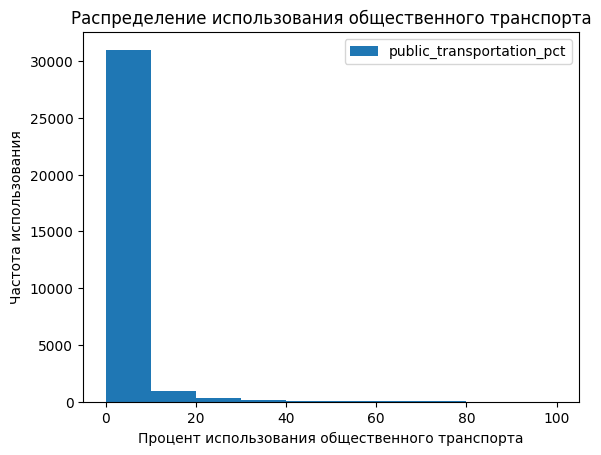

Соединение с PostgreSQL закрыто


In [ ]:
import psycopg2
import pandas
import matplotlib.pyplot as plt

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

try:
    # Подключение к базе данных
    connection = get_connection("postgres")
    
    # SQL-запрос для получения данных
    query = "SELECT * FROM public_transportation_statistics_by_zip_code WHERE public_transportation_pct >= 0;"
    
    # Загрузка в DataFrame
    my_data = pandas.read_sql(query, connection)

    # Построение гистограммы распределения
    my_data.plot.hist(y='public_transportation_pct')
    plt.title('Распределение использования общественного транспорта')
    plt.xlabel('Процент использования общественного транспорта')
    plt.ylabel('Частота использования')
    plt.show()

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

# Задание 6. Сгруппируйте клиентов по их zip_code, и посмотрите на среднее количество транзакций на одного клиента. Экспортируйте эти данные в Excel и создайте диаграмму рассеяния, чтобы лучше понять взаимосвязь между использованием общественного транспорта и продажами.

C:\Users\damdi\AppData\Local\Temp\ipykernel_20620\2367750039.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pandas.read_sql(query, connection)


Данные успешно экспортированы в файл: analysis_sales.csv


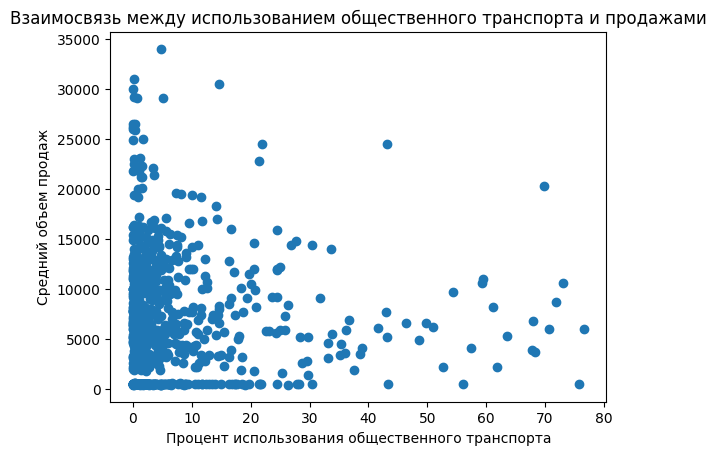

Соединение с PostgreSQL закрыто


In [ ]:
import psycopg2
import pandas
import matplotlib.pyplot as plt

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

try:
    # Подключение к базе данных 
    connection = get_connection("postgres")
    
    # SQL-запрос группировка  по zip_code
    query = """
    SELECT 
        pts.zip_code,
        COUNT(DISTINCT c.customer_id) AS customer_count,
        COUNT(*) / COUNT(DISTINCT c.customer_id) AS avg_transactions,
        AVG(s.sales_amount) AS avg_sales_amount,
        pts.public_transportation_pct
    FROM 
        customers c
    JOIN 
        sales s ON c.customer_id = s.customer_id
    JOIN 
        public_transportation_statistics_by_zip_code pts ON c.postal_code = pts.zip_code
    WHERE public_transportation_pct >= 0
    GROUP BY 
        pts.zip_code, pts.public_transportation_pct;
    """
    
    # Загрузка  в DataFrame
    data = pandas.read_sql(query, connection)

    # Экспорт данных в CSV
    csv_file = "analysis_sales.csv"
    data.to_csv(csv_file, index=False)
    print(f"Данные успешно экспортированы в файл: {csv_file}")

    # Построение диаграммы рассеяния
    plt.scatter(data['public_transportation_pct'], data['avg_sales_amount'])
    plt.title('Взаимосвязь между использованием общественного транспорта и продажами')
    plt.xlabel('Процент использования общественного транспорта')
    plt.ylabel('Средний объем продаж')
    plt.show()

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

# Задание 7.	На основании этого анализа, какие рекомендации вы бы дали руководству компании при рассмотрении возможностей расширения?

### Анализ диаграммы рассеивания  демонстрирует, что корреляция обратнопропорциональная. То есть, чем выше процент пользования общественного транспорта, тем ниже средний объем продаж. 
### На основе этого анализа, я бы дала следующие рекомендации: выбирать локации, где доля пользования общественным транспортом минимальна. Это позволит увеличить потенциал продаж в данных районах; создать специальные программы лояльности для жителей районов с низким использованием общественного транспорта, чтобы мотивировать их к покупкам через удобные им каналы.